## Assignment B3 Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("AirQuality.csv")

In [3]:
df.head(9)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.0,190.0,7.4,67,5,1,High
1,2,36.0,118.0,8.0,72,5,2,Low
2,3,12.0,149.0,12.6,74,5,3,High
3,4,18.0,313.0,11.5,62,5,4,Medium
4,5,NaN,NaN,14.3,56,5,5,High
5,6,28.0,NaN,14.9,66,5,6,Low
6,7,23.0,299.0,8.6,65,5,7,High
7,8,19.0,99.0,13.8,59,5,8,Medium
8,9,8.0,19.0,20.1,61,5,9,High


In [4]:
df.isnull().sum()

Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           0
Temp           0
Month          0
Day            0
Humidity       4
dtype: int64

## Data Cleaning

In [5]:
df = df.drop('Unnamed: 0', axis = 1)

In [6]:
df["Ozone"] = df["Ozone"].fillna(df["Ozone"].mean())

In [7]:
df["Solar.R"] = df["Solar.R"].fillna(df["Solar.R"].mean())

In [8]:
df["Wind"] = df["Wind"].fillna(df["Wind"].mean())

### Replace Categorical NUll values

In [9]:
df["Humidity"] = df["Humidity"].fillna(df["Humidity"].mode()[0])

In [10]:
df.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
Humidity    0
dtype: int64

## Data Transformation

### Label encoding humidity column

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
df["Humidity"] = le.fit_transform(df["Humidity"])

In [14]:
df["Humidity"].unique()

array([0, 1, 2])

## Visualising the data

### Scatter Plot

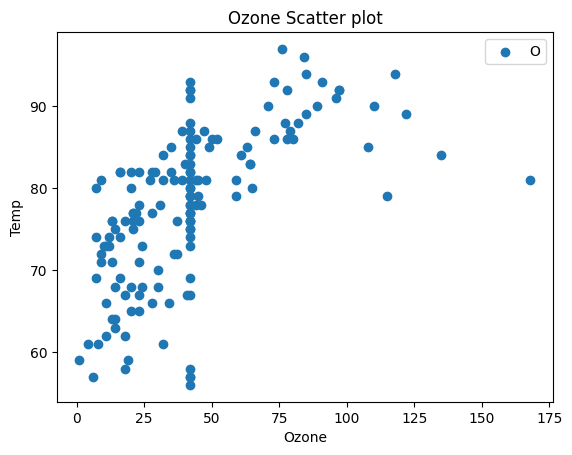

In [15]:
plt.scatter(x = df["Ozone"], y = df["Temp"])
plt.legend("Ozone")
plt.xlabel("Ozone")
plt.ylabel("Temp")
plt.title("Ozone Scatter plot")
plt.show()

### Bar plot

<Axes: xlabel='Month', ylabel='Temp'>

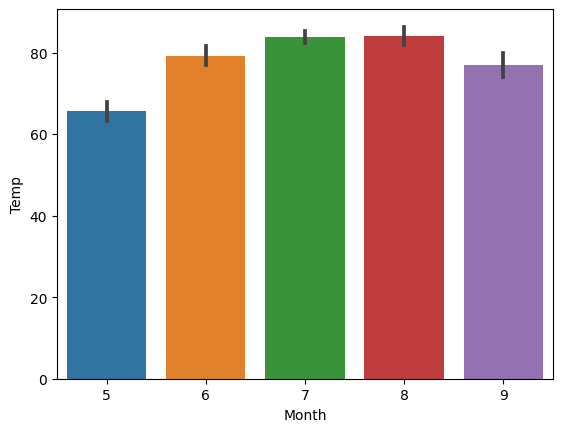

In [17]:
sns.barplot(x = df["Month"],y = df["Temp"])

### Heatmap

In [18]:
corr = df.corr()

<Axes: >

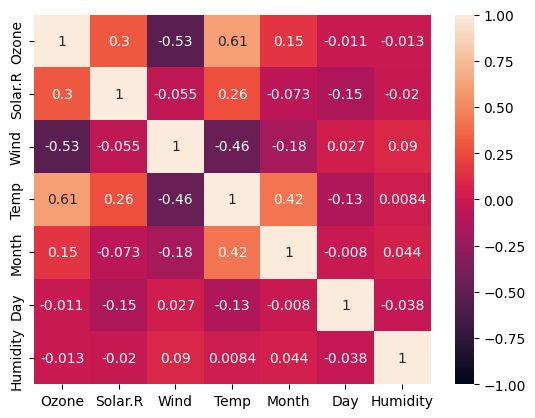

In [19]:
sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)

### Pairplot

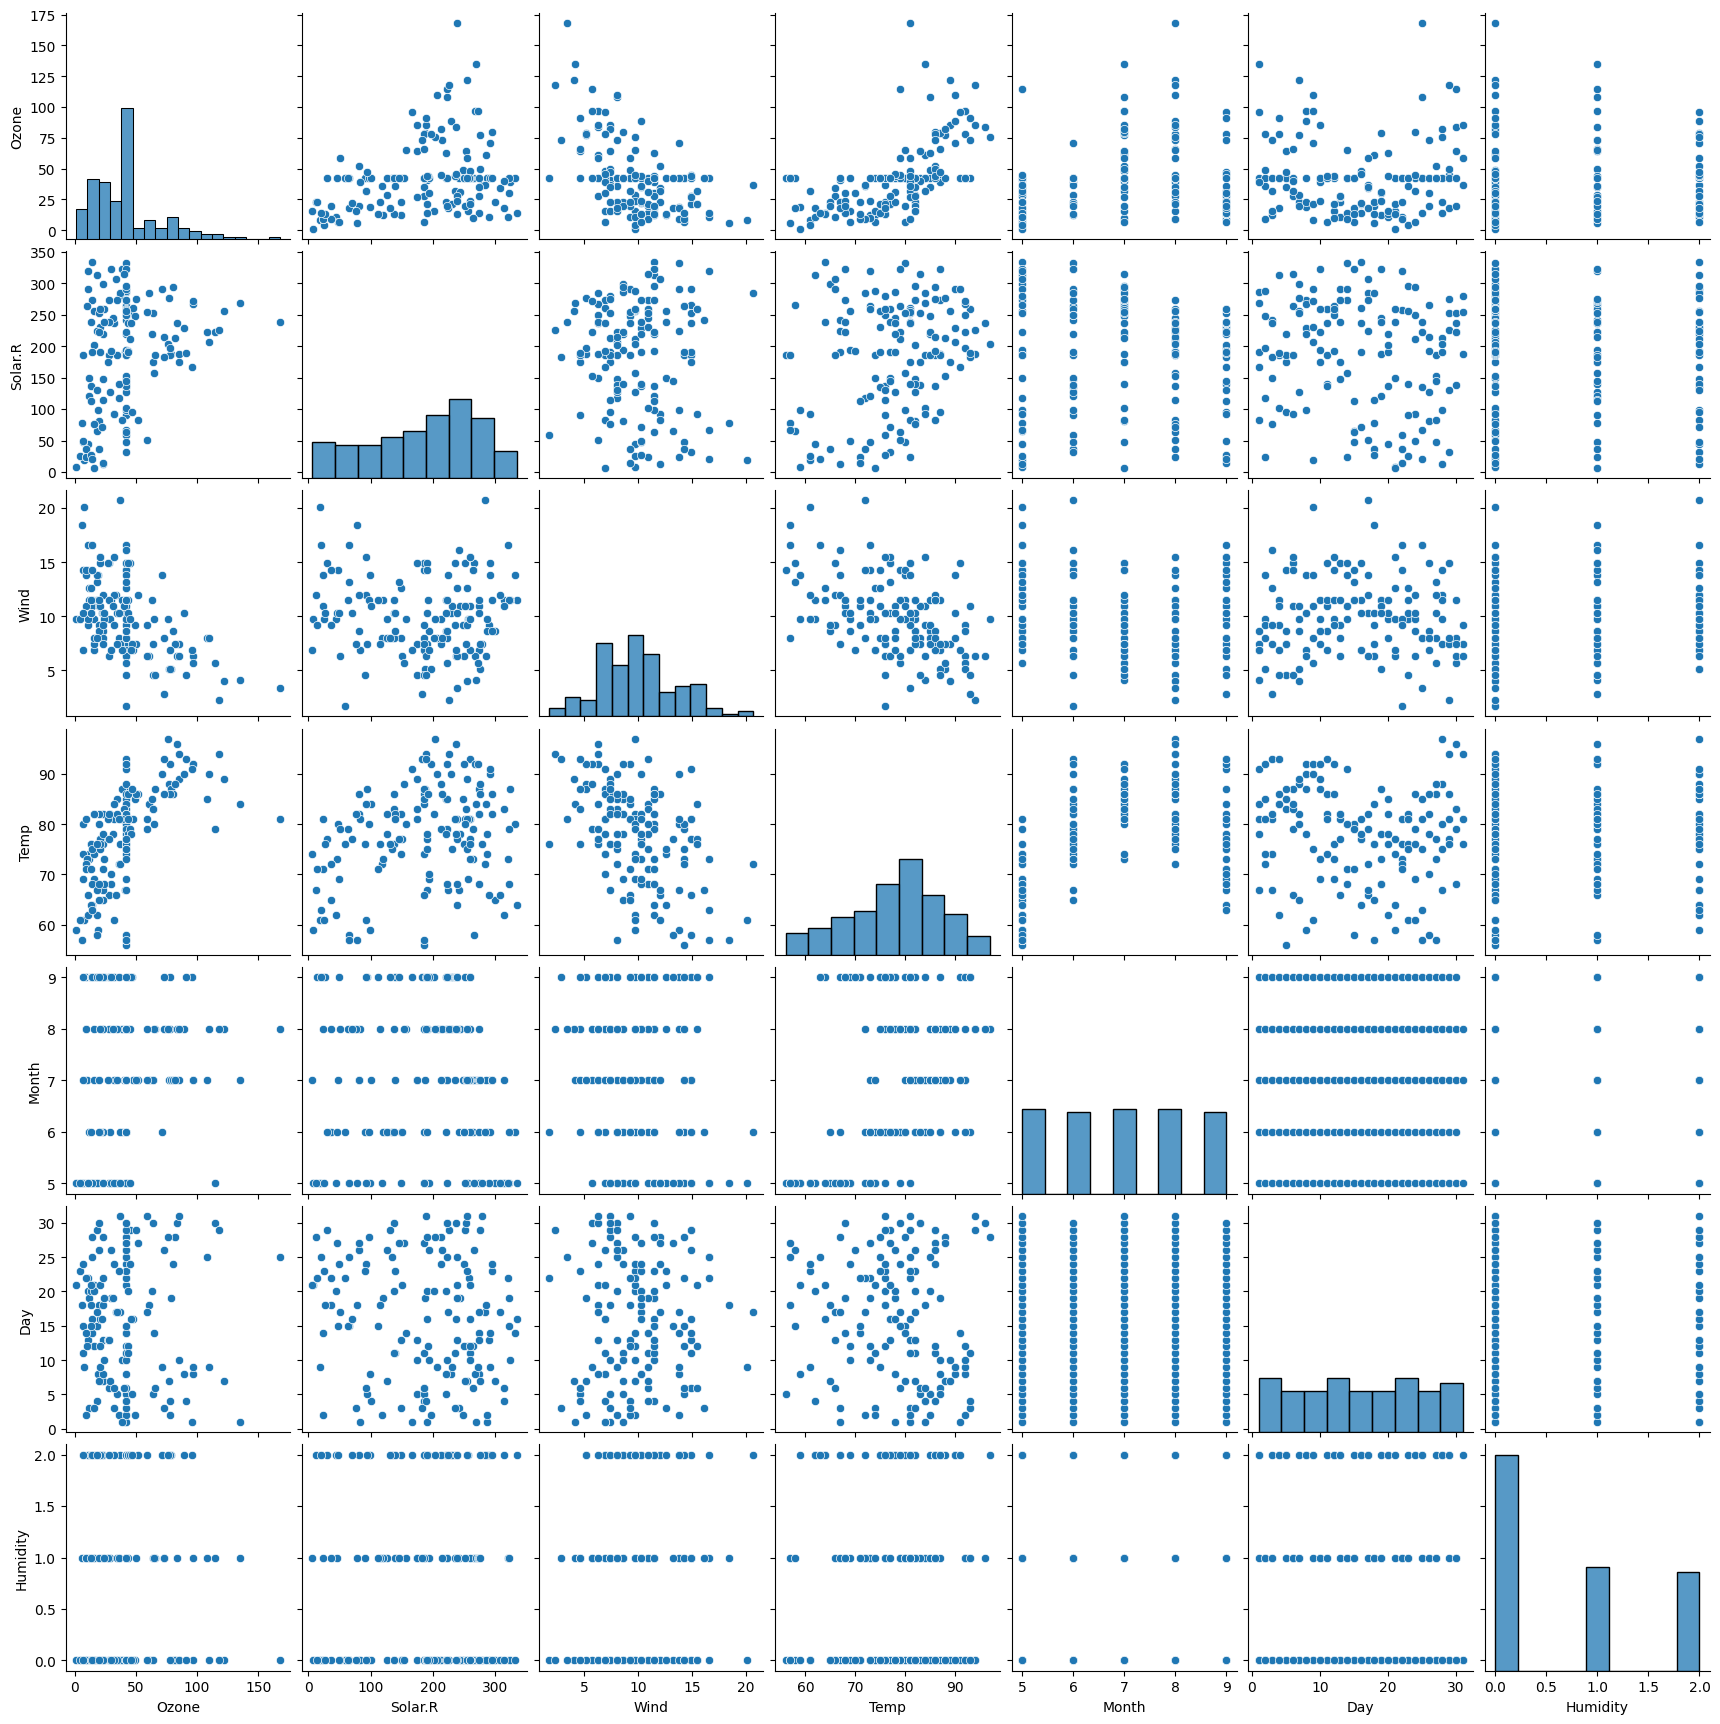

In [20]:
sns.pairplot(df)

### Line Graph

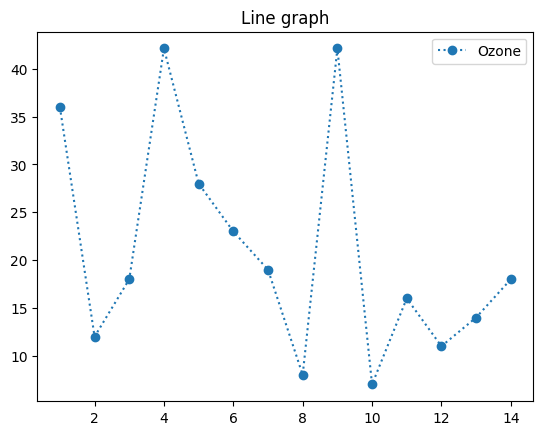

In [21]:
g = df.iloc[1:15, 0]
plt.plot(g, label = "Ozone", marker = "o", linestyle = "dotted")
plt.title("Line graph")
plt.legend()
plt.show()

### Box Plot

<Axes: xlabel='Month', ylabel='Temp'>

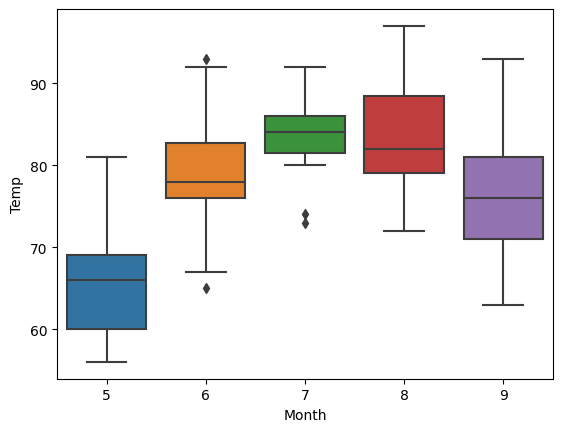

In [23]:
sns.boxplot(x = df["Month"], y = df["Temp"])

### Pie Chart

Text(0.5, 1.0, 'AirQuality Factors')

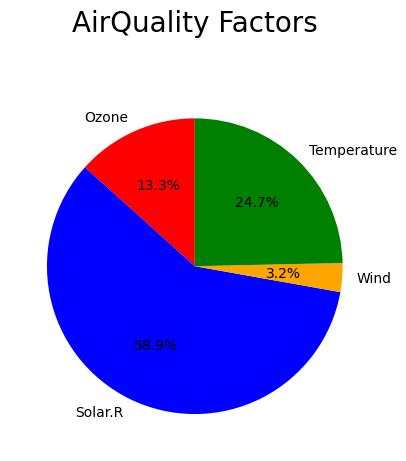

In [26]:
labels = ["Ozone", "Solar.R", "Wind", "Temperature"]
sizes = [df["Ozone"].mean(), df["Solar.R"].mean(), df["Wind"].mean(),df["Temp"].mean()]
colors = ["red", "blue", "Orange", "green"]
textprops = {"fontsize": 15}
plt.pie(sizes, labels=labels, colors = colors, autopct = '%1.1f%%', startangle = 90)
plt.title("AirQuality Factors", fontsize = 20, pad = 36)

### Histogram

[]

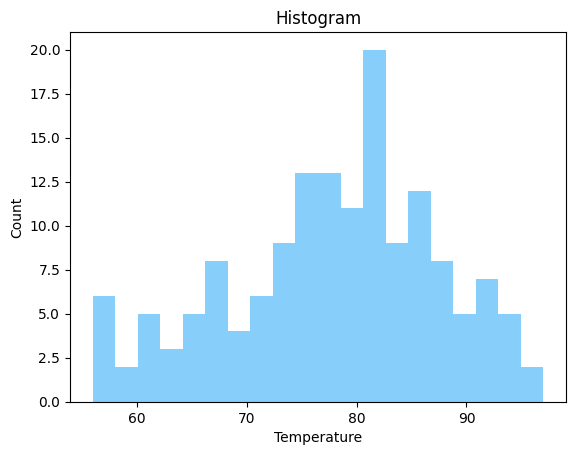

In [28]:
plt.hist(x = df["Temp"], bins = 20, color = "lightskyblue", label = "Temp")
plt.title("Histogram")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.plot()

### Word cloud

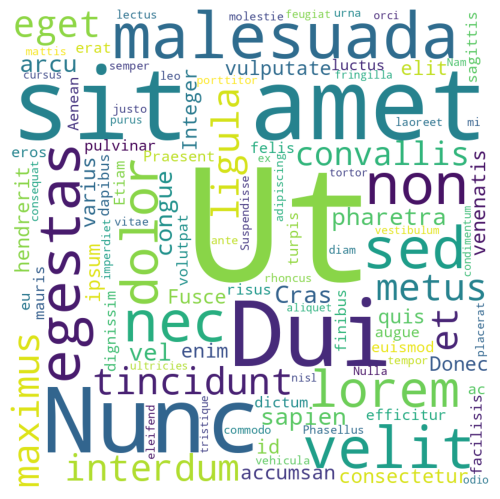

In [29]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

text = """"Lorem ipsum dolor sit amet, consectetur adipiscing elit. Donec varius tincidunt dui sit amet rhoncus. 
Nunc a vulputate ligula, porttitor maximus lorem. Suspendisse hendrerit metus quis urna accumsan varius. Duis interdum venenatis mi et interdum. 
Fusce maximus vehicula velit eget malesuada. Integer convallis enim lectus, id pulvinar eros egestas non. 
Donec interdum pharetra efficitur. Nunc nunc velit, dapibus ac augue quis, luctus malesuada sapien.

Praesent facilisis erat eu turpis congue consequat. Etiam dignissim ligula id luctus mattis. 
Nulla pharetra sapien nec risus convallis molestie. In enim dui, euismod vel egestas eget, laoreet non arcu. 
Cras sit amet tincidunt dolor, nec convallis metus. Ut dolor justo, maximus ac ante eget, dapibus sagittis felis. 
Etiam ut tempor erat. Praesent consectetur malesuada leo, sed commodo metus egestas sed. Integer nec malesuada velit. 
Fusce finibus volutpat elit tincidunt imperdiet. Cras nec semper arcu. Cras ut volutpat eros. Duis ut placerat diam, vitae accumsan arcu.

Nunc congue euismod risus non facilisis. Ut dictum eleifend augue at venenatis. 
Phasellus fringilla vulputate purus. Aenean vestibulum dictum lorem et ultricies. 
Nunc tristique odio a velit hendrerit feugiat. Aenean aliquet ipsum congue, cursus tortor vel, pulvinar orci. 
Ut sagittis vel mauris a pharetra. Nam egestas condimentum felis, sit amet finibus mauris efficitur non. Duis sit amet ligula sapien. 
Sed eu turpis et ex dignissim malesuada sit amet sed nisl."""


wordcloud = WordCloud(width = 800, height = 800, background_color = "white", stopwords = stopwords, min_font_size = 10).generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()